In [1]:
# Prediction of Is_cheap column with the explicative features 
# ['gender', 'weekday', 'is_morning','product_group', 'line_item_amount']

### Importing Libreries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

import math as m
import scipy.stats as stats

In [3]:
#Reading data

In [4]:
os.chdir(r'C:\Users\alber\OneDrive\Desktop\IronHAck\DATASETS\mid_proyect')
data = pd.read_csv('coffee_refinal.csv')

In [5]:
data.head()

,product_id,customer_id,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,instore_yn,orders,line_item_id,...,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,pa_sales_outlet_id,pa_transaction_date,start_of_day,quantity_sold,waste,perct_waste
0,52,558,7,2019-04-01,12:04:43,3,12,N,1,1,...,$2.50,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN
1,27,781,11,2019-04-01,15:54:39,3,17,N,1,1,...,$3.50,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN
2,46,788,19,2019-04-01,14:34:59,3,17,Y,1,1,...,$2.50,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN
3,23,683,32,2019-04-01,16:06:04,3,12,N,1,1,...,$2.50,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN
4,34,99,33,2019-04-01,19:18:37,3,17,Y,1,1,...,$2.45,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280345 entries, 0 to 280344
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_id               280345 non-null  int64  
 1   customer_id              280345 non-null  int64  
 2   transaction_id           280345 non-null  int64  
 3   transaction_date         280345 non-null  object 
 4   transaction_time         280345 non-null  object 
 5   sales_outlet_id          280345 non-null  int64  
 6   staff_id                 280345 non-null  int64  
 7   instore_yn               280345 non-null  object 
 8   orders                   280345 non-null  int64  
 9   line_item_id             280345 non-null  int64  
 10  quantity                 280345 non-null  int64  
 11  line_item_amount         280345 non-null  float64
 12  unit_price               280345 non-null  float64
 13  promo_item_yn            280345 non-null  object 
 14  home

In [7]:
data.shape

(280345, 39)

In [8]:
data.isna().any()

product_id                 False
customer_id                False
transaction_id             False
transaction_date           False
transaction_time           False
sales_outlet_id            False
staff_id                   False
instore_yn                 False
orders                     False
line_item_id               False
quantity                   False
line_item_amount           False
unit_price                 False
promo_item_yn              False
home_store                  True
customer_first-name         True
customer_email              True
customer_since              True
loyalty_card_number         True
birthdate                   True
gender                      True
birth_year                  True
product_group              False
product_category           False
product_type               False
product                    False
product_description        False
unit_of_measure            False
current_wholesame_price    False
current_retail_price       False
tax_exempt

# Preprocessing

In [9]:
#Remove duplicated in the DataFrame
data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
data.shape

(280345, 39)

In [10]:
# Dataframe to csv
#compression_opts = dict(method='zip',
#                      archive_name='coffee_refinal.csv')  
#data.to_csv('coffee_refinal.zip', index=False,
#          compression=compression_opts)

In [11]:
# Splitting the dataframes between coffees and pastry

#pastry_df = data.loc[(data['product_id'] >= 69) & (data['product_id'] <= 73)]

#coffee_df = data.iloc[:, 0:33]

In [12]:
# Creating new column 'unit_price_range' splitting the prizes in 3 ranges

#data.loc[(data.unit_price <= 2.5), 'unit_price_range'] = 1
#data.loc[(data.unit_price < 10) & (data.unit_price > 2.5) , 'unit_price_range'] = 2
#data.loc[(data.unit_price >= 10 ), 'unit_price_range'] = 3

#### unit_price_range = 1 --> LOW (<2.5 €)

#### unit_price_range = 2 --> MEDIUM ( 2.5 > 10 €)

#### unit_price_range = 3 --> HIGH (<10 €)

In [13]:
data['is_cheap'] = (data["unit_price"] <= 3.5)

In [14]:
data['is_cheap'].value_counts()
# True is cheapper than 3.5 €
#False is more expensive than 3.5€

True     165994
False    114351
Name: is_cheap, dtype: int64

In [15]:
data['is_morning']= (data["transaction_time"] >= '05:00:00') & (data["transaction_time"] <= '12:00:00')

In [34]:
data.loc[(data.birth_year <= 1969), 'generation'] = 1
data.loc[(data.birth_year > 1969) & (data.birth_year < 1990 ) , 'generation'] = 2
data.loc[(data.birth_year >= 1990 ), 'generation'] = 3

In [16]:
data["transaction_date"] = data["transaction_date"].apply(pd.to_datetime)

data["weekday"] = data["transaction_date"].dt.strftime('%w')

# %w	Day of the week where Sunday=0 and Saturday=6

In [17]:
data.columns

Index(['product_id', 'customer_id', 'transaction_id', 'transaction_date',
       'transaction_time', 'sales_outlet_id', 'staff_id', 'instore_yn',
       'orders', 'line_item_id', 'quantity', 'line_item_amount', 'unit_price',
       'promo_item_yn', 'home_store', 'customer_first-name', 'customer_email',
       'customer_since', 'loyalty_card_number', 'birthdate', 'gender',
       'birth_year', 'product_group', 'product_category', 'product_type',
       'product', 'product_description', 'unit_of_measure',
       'current_wholesame_price', 'current_retail_price', 'tax_exempt_yn',
       'promo_yn', 'new_product_yn', 'pa_sales_outlet_id',
       'pa_transaction_date', 'start_of_day', 'quantity_sold', 'waste',
       'perct_waste', 'is_cheap', 'is_morning', 'weekday'],
      dtype='object')

In [19]:
# Choosing features and dropping duplicates/NaNs. Maybe include 'instore_yn', 'product_group', 'new_product_yn', 'product_type'

X = data.loc[:, ['gender', 'weekday', 'is_morning',
             'product_group', 'line_item_amount', 'is_cheap']]

X.drop_duplicates(keep='first', inplace=True, ignore_index=False)

X.dropna(inplace=True)


y = X.loc[:,'is_cheap']
X = X.loc[:,['gender', 'weekday', 'is_morning',
             'product_group', 'line_item_amount']]

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 280269
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2061 non-null   object 
 1   weekday           2061 non-null   object 
 2   is_morning        2061 non-null   bool   
 3   product_group     2061 non-null   object 
 4   line_item_amount  2061 non-null   float64
dtypes: bool(1), float64(1), object(3)
memory usage: 82.5+ KB


In [21]:
#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

print("Nb rows X_train = {}".format(len(X_train)))
print("Nb rows X_test = {}".format(len(X_test)))
print("Nb rows y_train = {}".format(len(y_train)))
print("Nb rows y_test = {}".format(len(y_test)))

Nb rows X_train = 1442
Nb rows X_test = 619
Nb rows y_train = 1442
Nb rows y_test = 619


In [22]:
# Encoding categorical features and standardizing numeric features

numeric_features = [4] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = [0, 1, 2, 3] 
categorical_transformer = OneHotEncoder()


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )


X_train = feature_encoder.fit_transform(X_train)
X_test = feature_encoder.transform(X_test)


#Encoding target variable
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

## MODELING

In [23]:
model1 = LogisticRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()

In [24]:
def Log_Reg(model):

    model.fit(X_train, y_train)
        
    # Evaluation of the model
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
        
    print(classification_report(y_train, pred_train))
    print(classification_report(y_test, pred_test))
    
    # Visualize confusion matrices
    _ , ax = plt.subplots() # Get subplot from matplotlib
    ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(model, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
    plt.show()

    _ , ax = plt.subplots() # Get subplot from matplotlib
    ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn

In [25]:
def ran_for(model, forest):

    model.fit(X_train, y_train)
    
    # Evaluation of the model
    print("Train Score : {}".format(model.score(X_train, y_train)))
    print('Test Score : {}'.format(model.score(X_test, y_test)))
    

In [26]:
def dec_tree(model, leaf):
    
    model.fit(X_train, y_train)
    
    # Evaluation of the model
    print("Train Score : {}".format(model.score(X_train, y_train)))
    print('Test Score : {}'.format(model.score(X_test, y_test)))
    
 

              precision    recall  f1-score   support

           0       0.81      0.63      0.71       651
           1       0.74      0.88      0.80       791

    accuracy                           0.77      1442
   macro avg       0.78      0.75      0.76      1442
weighted avg       0.77      0.77      0.76      1442

              precision    recall  f1-score   support

           0       0.85      0.69      0.76       285
           1       0.77      0.90      0.83       334

    accuracy                           0.80       619
   macro avg       0.81      0.79      0.80       619
weighted avg       0.81      0.80      0.80       619



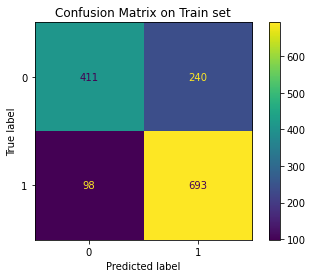

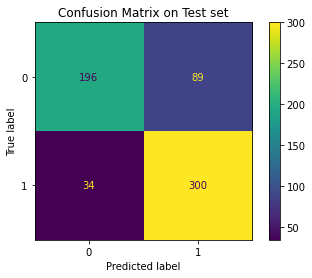

In [27]:
Log_Reg(model1)

In [40]:
#Random Forest
ran_for(model3, 200)

Train Score : 0.9185192417730982
Test Score : 0.732909714486941


In [41]:
#Decision Tree
dec_tree(model2, 3)

Train Score : 0.925791498443511
Test Score : 0.6293413173652695


# Visualizations

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280345 entries, 0 to 280344
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   product_id               280345 non-null  int64         
 1   customer_id              280345 non-null  int64         
 2   transaction_id           280345 non-null  int64         
 3   transaction_date         280345 non-null  datetime64[ns]
 4   transaction_time         280345 non-null  object        
 5   sales_outlet_id          280345 non-null  int64         
 6   staff_id                 280345 non-null  int64         
 7   instore_yn               280345 non-null  object        
 8   orders                   280345 non-null  int64         
 9   line_item_id             280345 non-null  int64         
 10  quantity                 280345 non-null  int64         
 11  line_item_amount         280345 non-null  float64       
 12  unit_price      

In [36]:
data_viz = data.iloc[: , [5, 11, 12, 14, 20, 22, 39, 40, 41, 42]]

In [37]:
numerical = data_viz.select_dtypes(exclude = object)
categorical = data_viz.select_dtypes(include = object)

In [ ]:
# Distribution plots

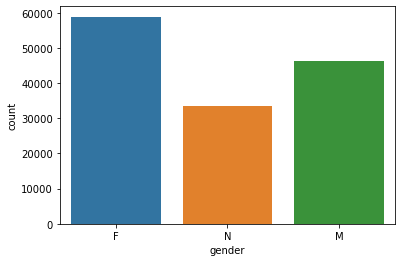

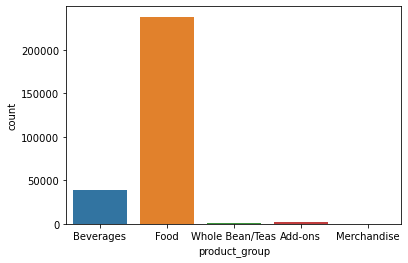

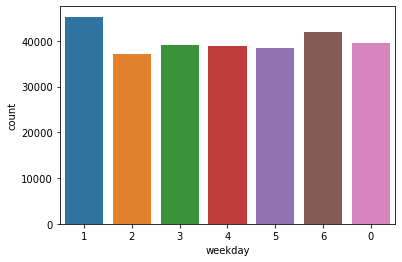

In [38]:
for column in categorical:
    plt.figure()
    sns.countplot(x=column, data=categorical)
    plt.show()

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


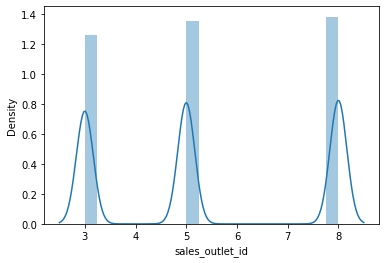

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


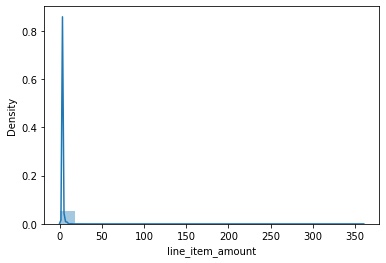

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


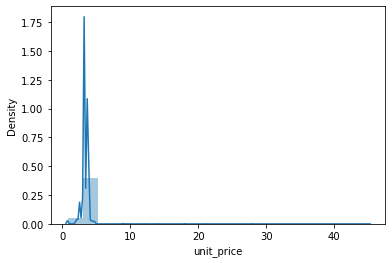

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


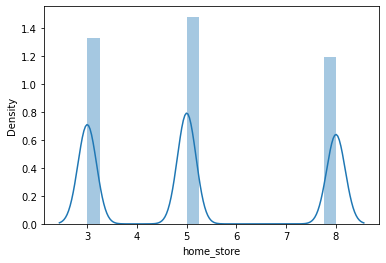

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


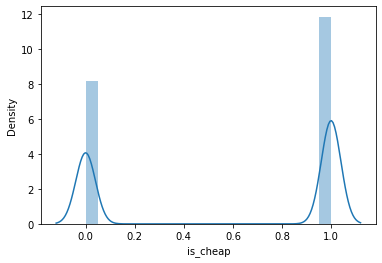

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


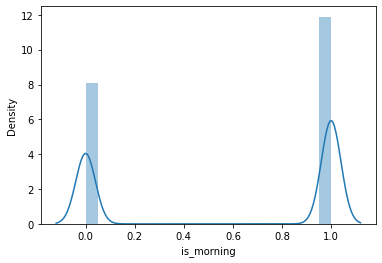

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


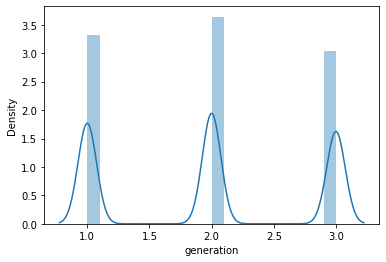

In [39]:
for column in numerical:
    sns.distplot(numerical[column], bins = 20)
    plt.show()